In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed, multivariate_normal
from matplotlib import cm


from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from itertools import chain

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Exploratory Data Analysis (EDA)**

In [2]:
# transaction = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/transaction.csv')
# identity = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/identity.csv')

transaction = pd.read_csv('transaction.csv')
identity = pd.read_csv('identity.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'transaction.csv'

In [3]:
# merging identity and transaction
merged_df = transaction.merge(identity, on='TransactionID', how='left')

In [4]:
merged_df.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   
5        2987005        0          86510            49.0         W   5937   
6        2987006        0          86522           159.0         W  12308   
7        2987007        0          86529           422.5         W  12695   
8        2987008        0          86535            15.0         H   2803   
9        2987009        0          86536           117.0         W  17399   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   
5  555.0  150.0        visa  226.0   debit  272.0   87.0   36.0    NaN   
6  360.0  150.0        visa  166.0   debit  126.0   87.0    0.0    NaN   
7  490.0  150.0        visa  226.0   debit  325.0   87.0    NaN    NaN   
8  100.0  150.0        visa  226.0   debit  337.0   87.0    NaN    NaN   
9  111.0  150.0  mastercard  224.0   debit  204.0   87.0   19.0    NaN   

   P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0            NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2    outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3      yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4      gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
5      gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
6      yahoo.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
7       mail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8  anonymous.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9      yahoo.com           NaN  2.0  2.0  0.0  0.0  0.0  3.0  0.0  0.0  3.0   

   C10  C11  C12   C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0    NaN   NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0   94.0   0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    NaN   NaN NaN NaN NaN NaN   
5  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN NaN NaN NaN NaN   
6  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN NaN NaN NaN NaN   
7  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN NaN NaN NaN NaN   
8  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    NaN   NaN NaN NaN NaN NaN   
9  0.0  1.0  0.0  12.0  2.0   61.0   61.0  30.0  318.0  30.0 NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5   0.0    0.0  NaN  NaN  NaN    0.0    T    T    T   M1    F    T  NaN  NaN   
6   0.0    0.0  NaN  NaN  NaN

In [5]:
# splitting into train and test data

X = merged_df.drop("isFraud", axis=1)
Y = merged_df["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (442905, 433)
X_test shape:  (147635, 433)
y_train shape:  (442905,)
y_test shape:  (147635,)


In [6]:
# Get the columns and their corresponding count of NaN values
nans_groups = {}
for col in X_train.columns:
    nan_count = X_train[col].isna().sum()
    nans_groups.setdefault(nan_count, []).append(col)

nan_summary = pd.DataFrame(
    [(nan_count, columns) for nan_count, columns in nans_groups.items()],
    columns=['NaN Count', 'Columns']
)

nan_summary

NaN Count                                            Columns
0           0  [TransactionID, TransactionDT, TransactionAmt,...
1        6711                                            [card2]
2        1168                                            [card3]
3        1178                                            [card4]
4        3215                                            [card5]
5        1173                                            [card6]
6       49375                                     [addr1, addr2]
7      264453                                            [dist1]
8      414605                                            [dist2]
9       70845                                    [P_emaildomain]
10     339662                                    [R_emaildomain]
11        957  [D1, V281, V282, V283, V288, V289, V296, V300,...
12     211061                                               [D2]
13     197630                                               [D3]
14     126760                                               [D4]
15     232544                                               [D5]
16     387874                                               [D6]
17     413585                                               [D7]
18     386527                             [D8, D9, id_09, id_10]
19      57085                                              [D10]
20     209632  [D11, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10,...
21     394191                                              [D12]
22     396302                                              [D13]
23     396195                                              [D14]
24      66891                                              [D15]
25     203485                                       [M1, M2, M3]
26     210992                                               [M4]
27     262891                                               [M5]
28     127241                                               [M6]
29     260009                                               [M7]
30     260000                                           [M8, M9]
31      57116  [V12, V13, V14, V15, V16, V17, V18, V19, V20, ...
32     126792  [V35, V36, V37, V38, V39, V40, V41, V42, V43, ...
33      57916  [V53, V54, V55, V56, V57, V58, V59, V60, V61, ...
34      66926  [V75, V76, V77, V78, V79, V80, V81, V82, V83, ...
35        230  [V95, V96, V97, V98, V99, V100, V101, V102, V1...
36     381369  [V138, V139, V140, V141, V142, V146, V147, V14...
37     381364  [V143, V144, V145, V150, V151, V152, V159, V16...
38     337976  [V167, V168, V172, V173, V176, V177, V178, V17...
39     337837  [V169, V170, V171, V174, V175, V180, V184, V18...
40     344898  [V217, V218, V219, V223, V224, V225, V226, V22...
41     336640  [V220, V221, V222, V227, V234, V238, V239, V24...
42          6  [V279, V280, V284, V285, V286, V287, V290, V29...
43     381054  [V322, V323, V324, V325, V326, V327, V328, V32...
44     334541                                     [id_01, id_12]
45     337058                                            [id_02]
46     392913                                     [id_03, id_04]
47     340050                                     [id_05, id_06]
48     438999                                     [id_07, id_08]
49     336975                              [id_11, id_28, id_29]
50     347179                                            [id_13]
51     382760                                            [id_14]
52     336971                [id_15, id_35, id_36, id_37, id_38]
53     345692                                            [id_16]
54     338188                                            [id_17]
55     409101                                            [id_18]
56     338225                                            [id_19]
57     338263                                            [id_20]
58     438995                                            [id_21]
59     438987                              [id_22, id_23, id_27]
60     439322                          

# **Reduction of V Columns**

As V columns are engineered by Vesta and may be highly correlated with one another, we seek to reduce the number of v columns. Grouping the V columns by their NAN counts, we conduct a correlation analysis within these groups to drop redundant V columns.

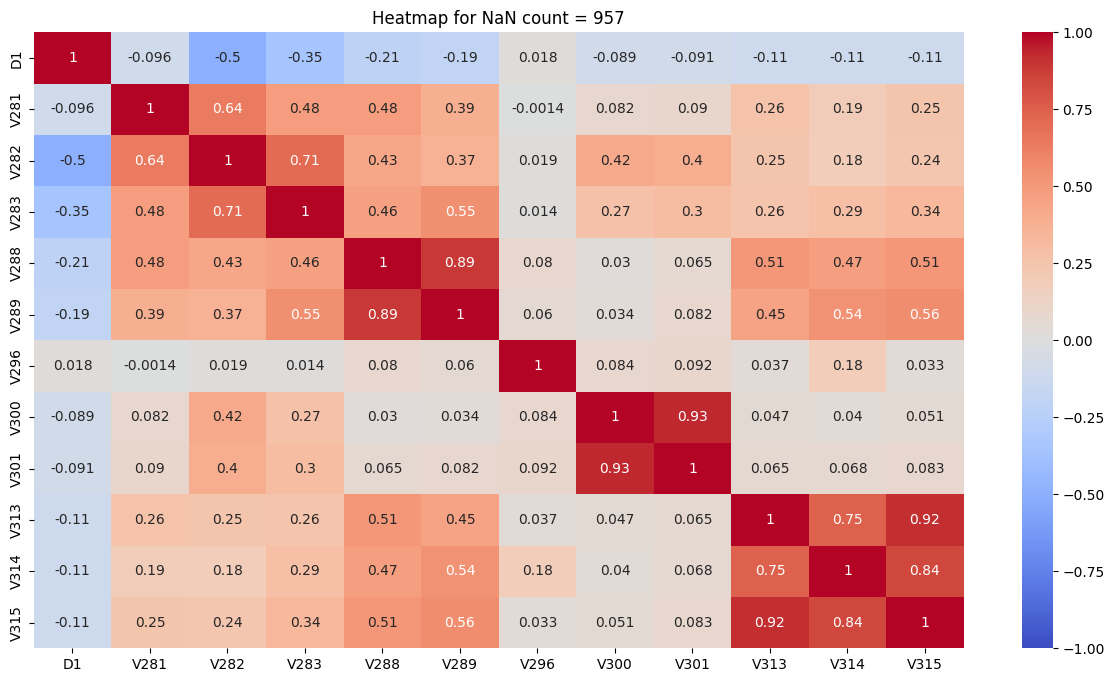

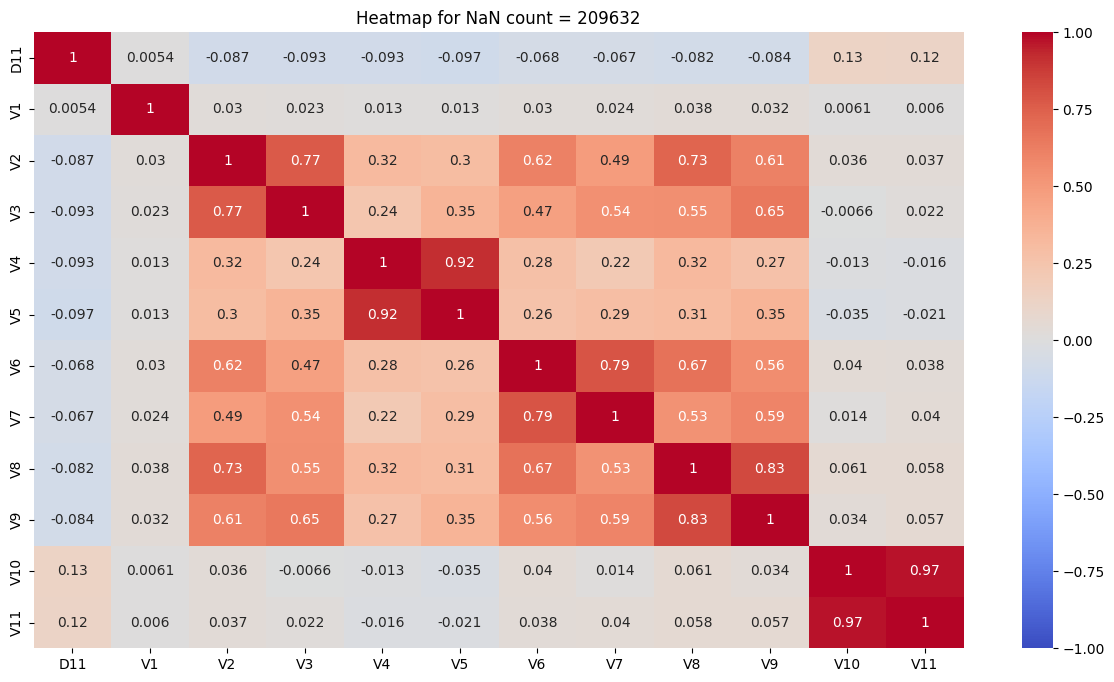

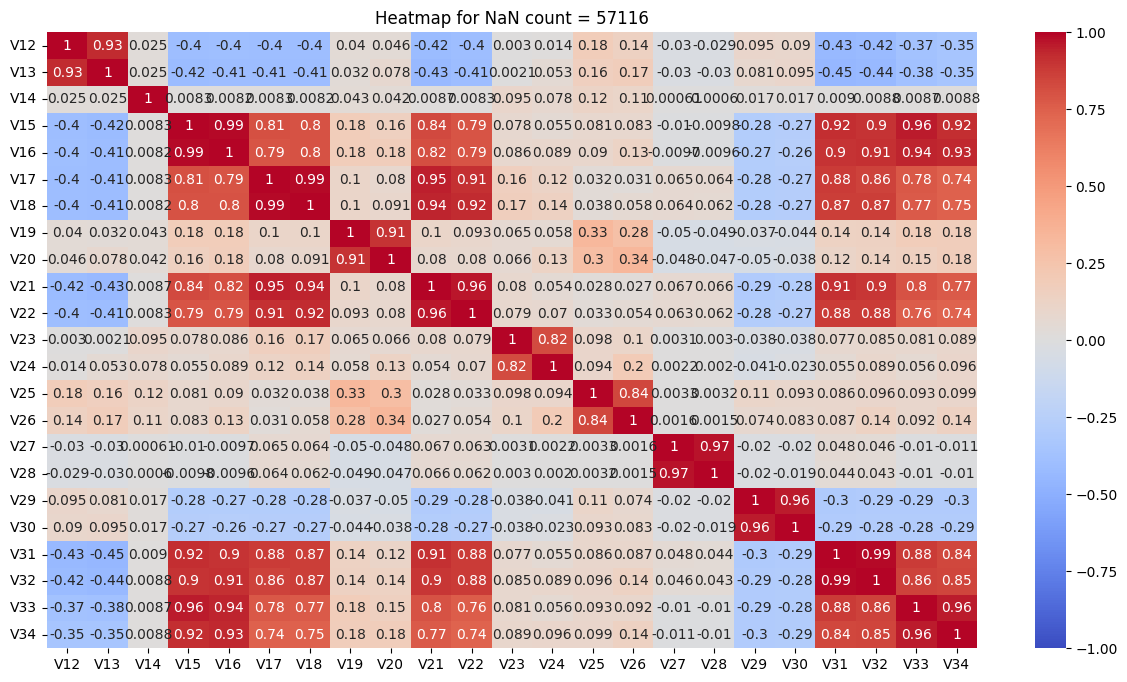

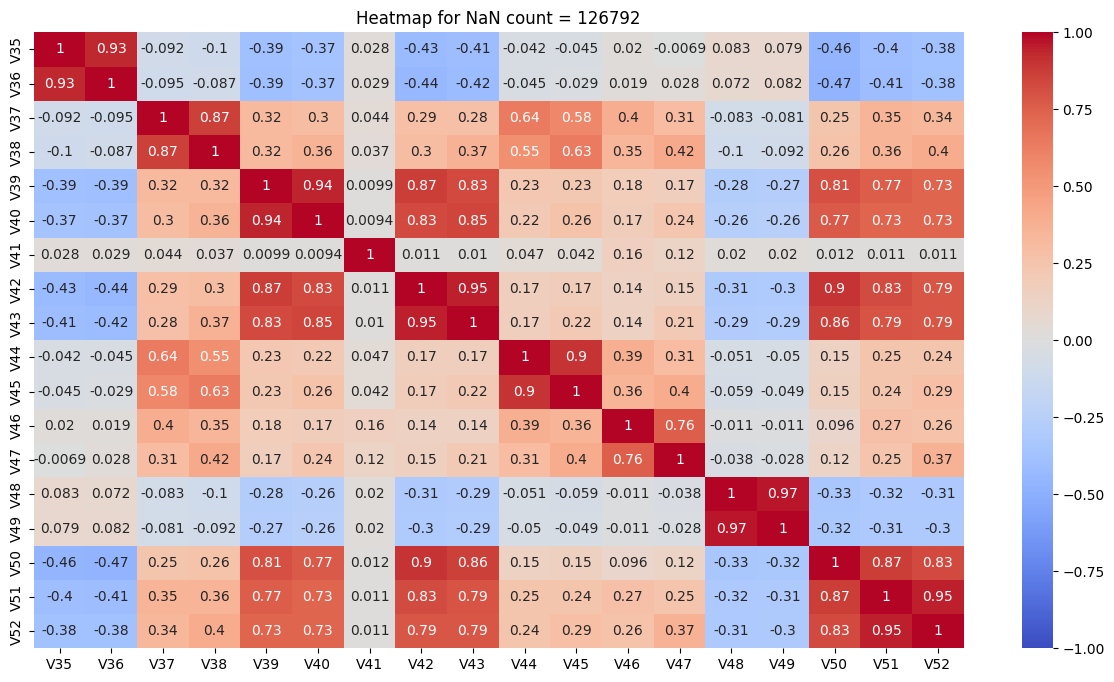

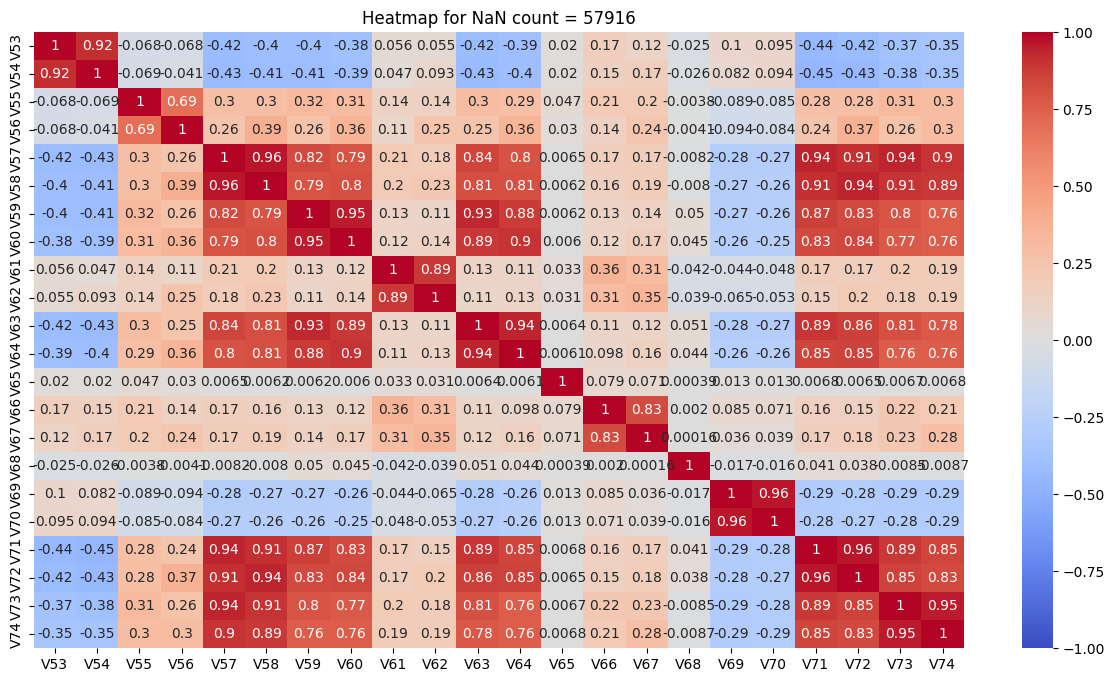

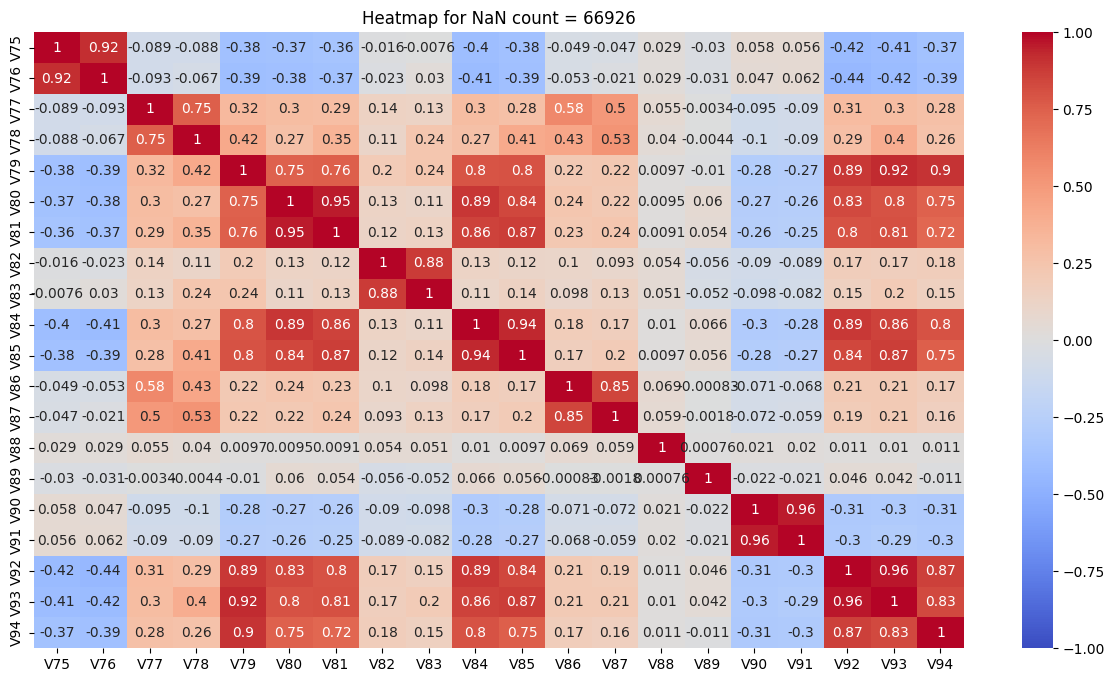

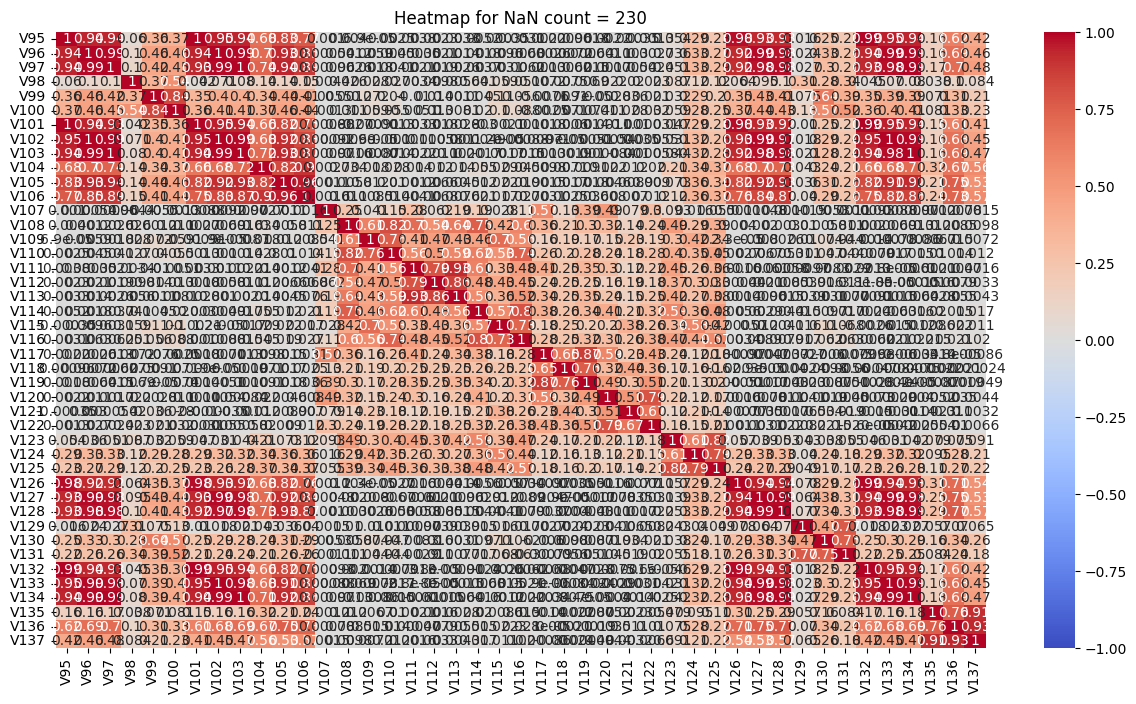

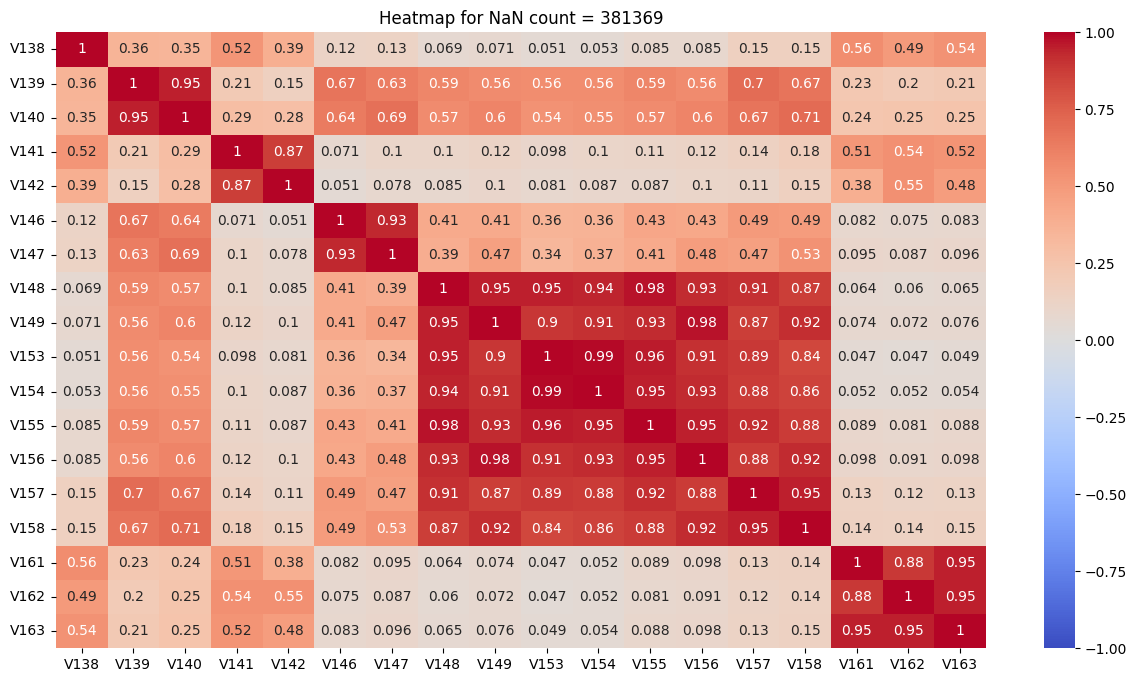

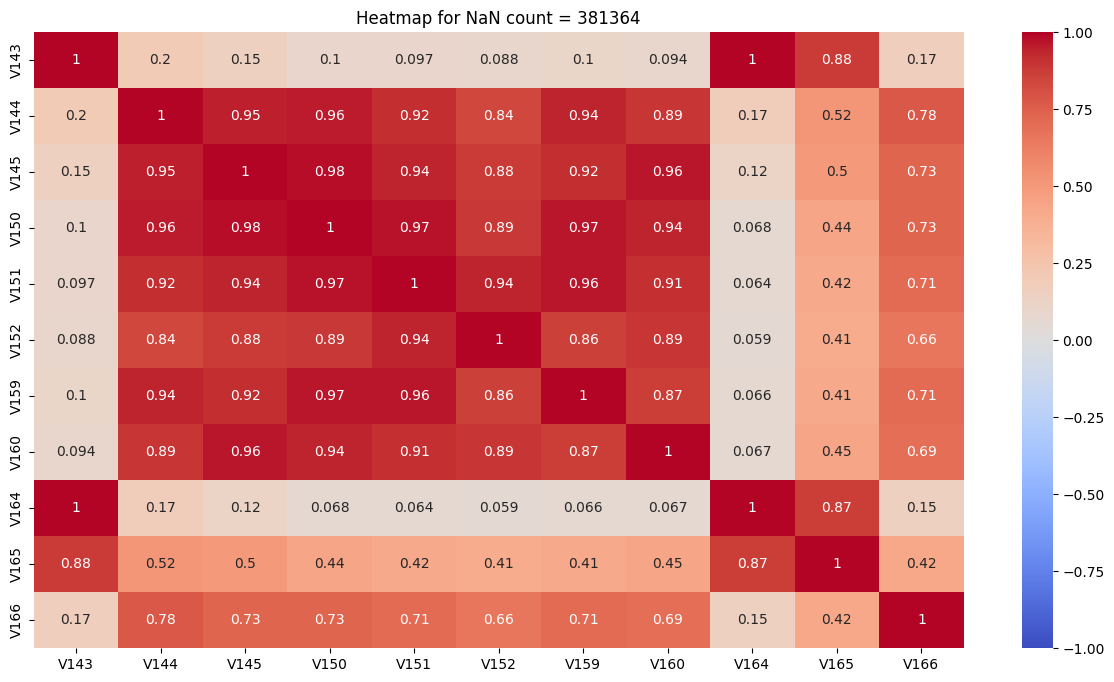

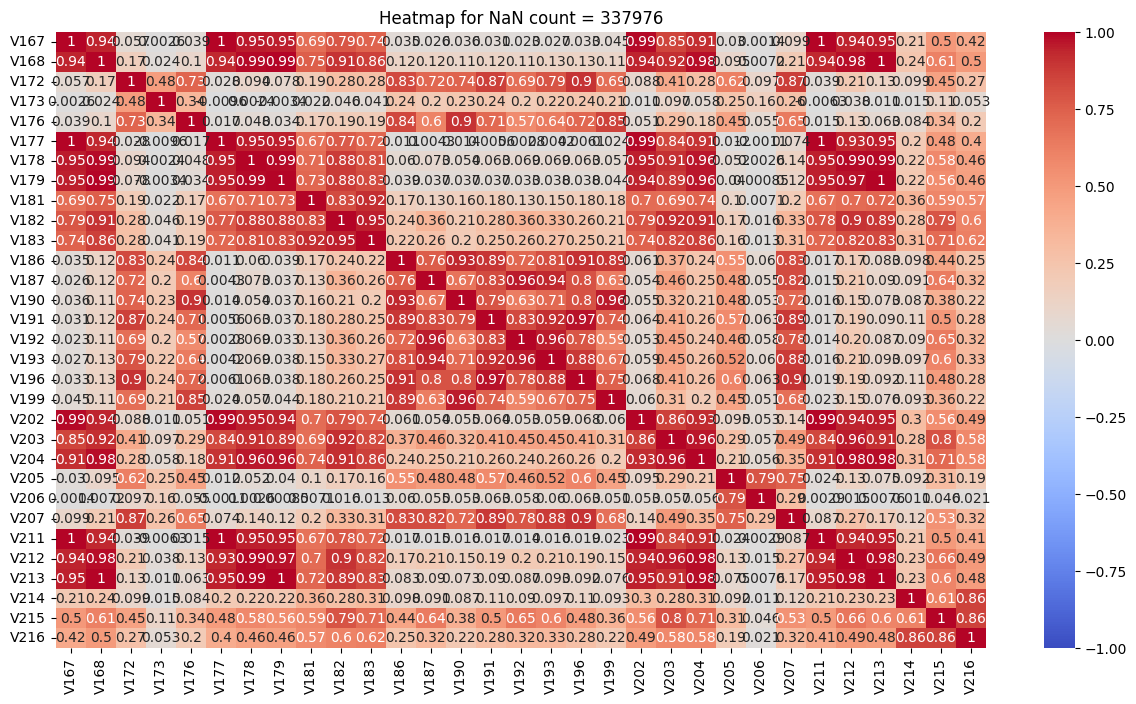

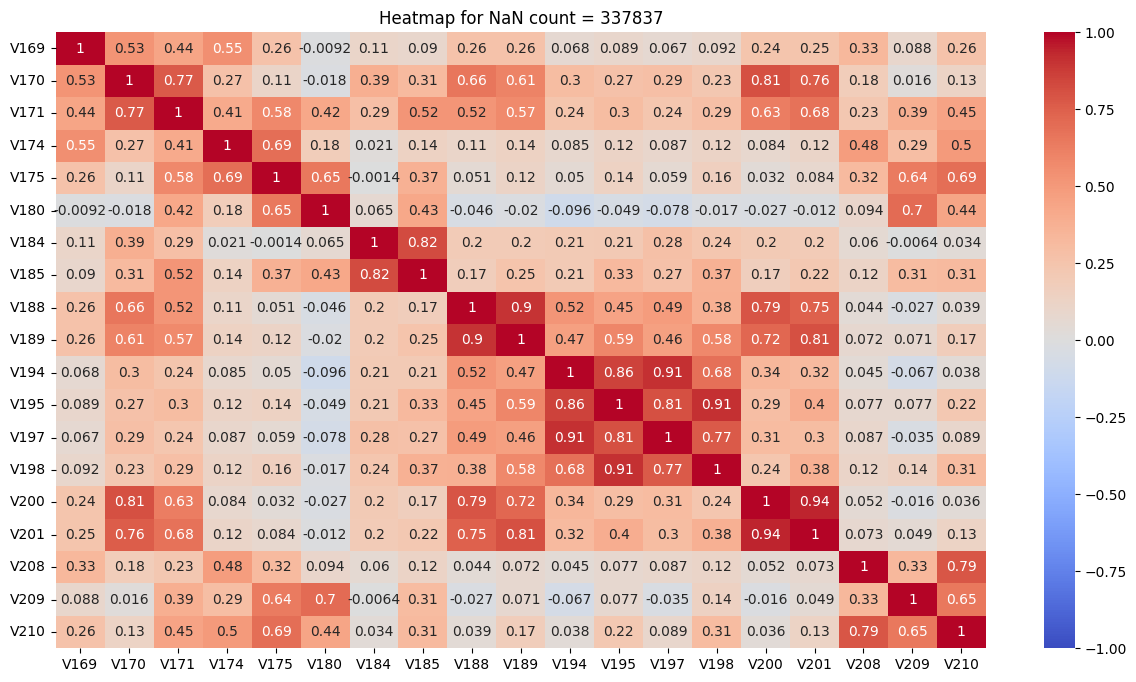

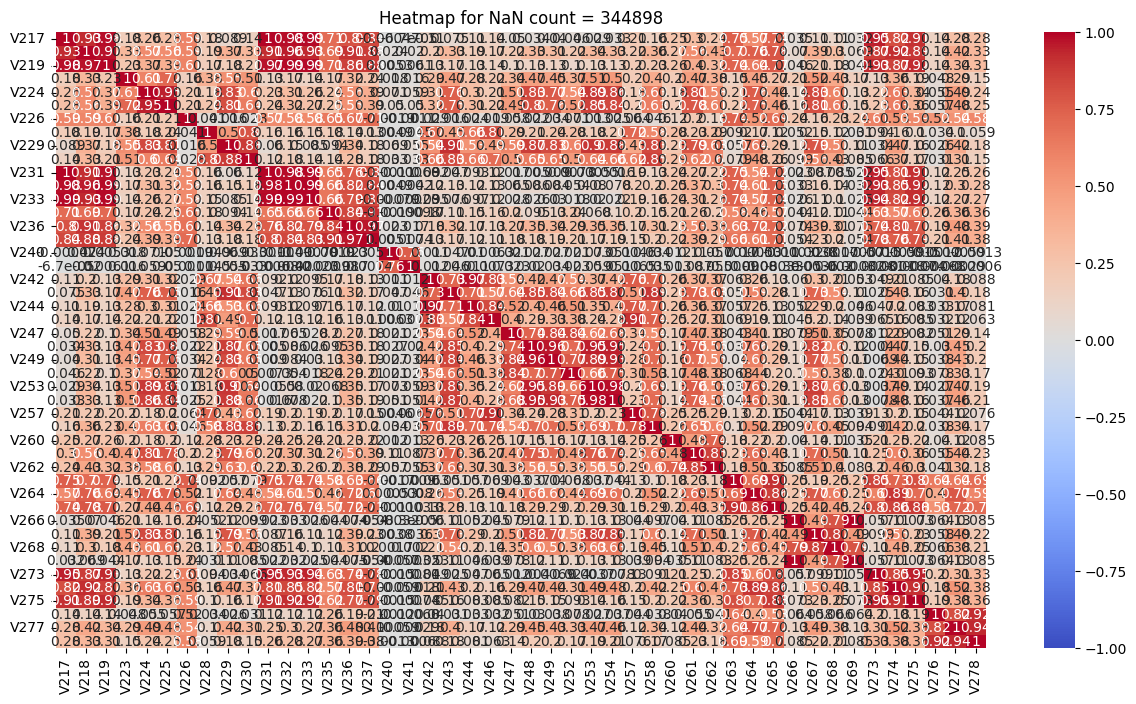

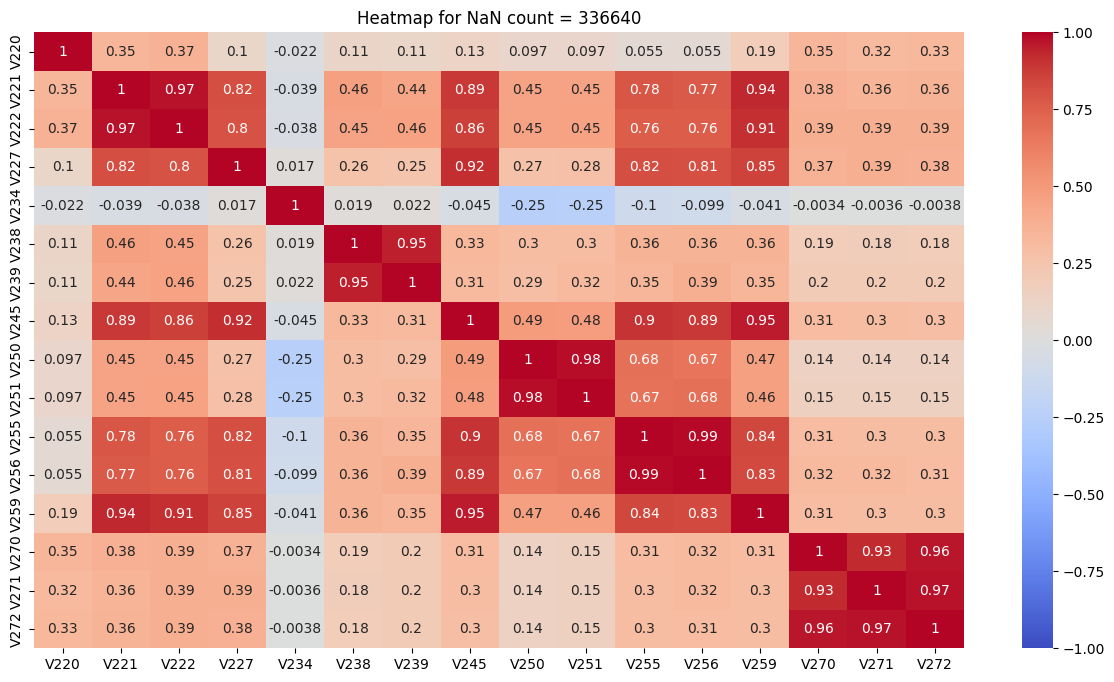

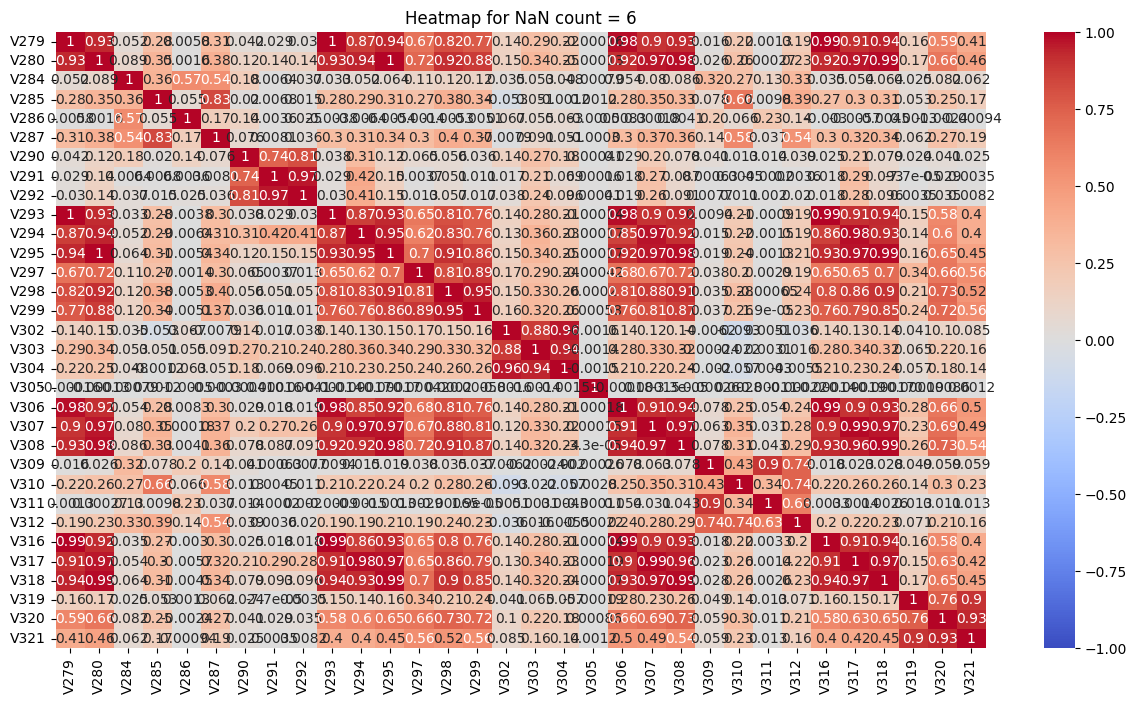

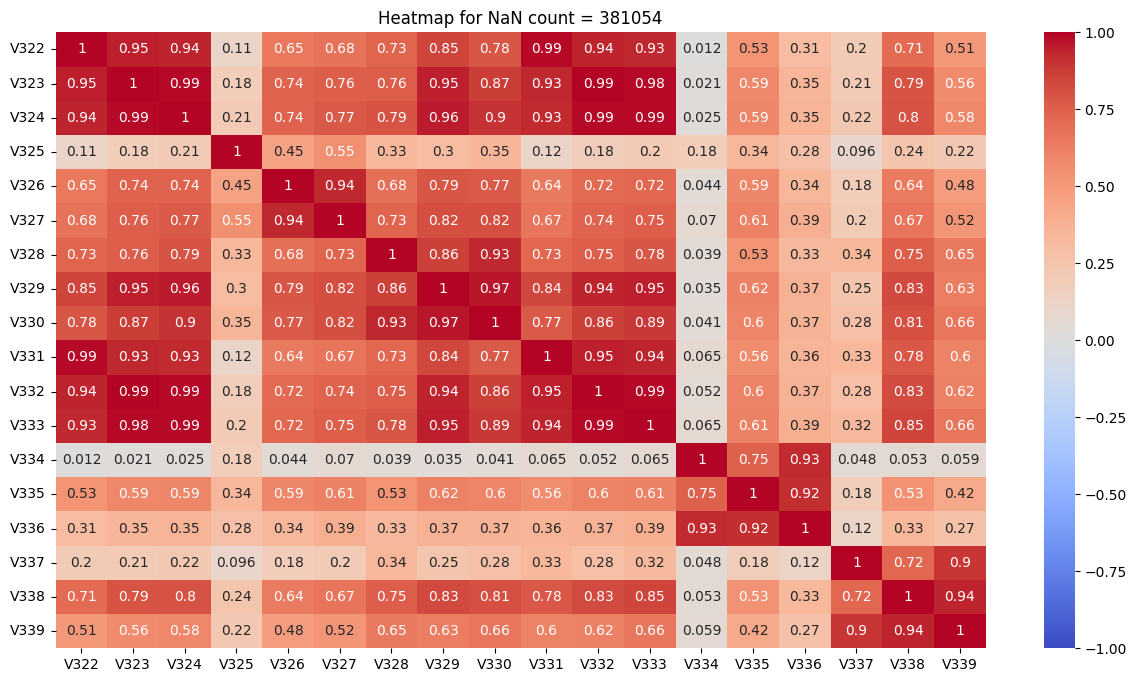

[[['D1'], ['V281'], ['V282', 'V283'], ['V288', 'V289'], ['V296'], ['V301', 'V300'], ['V314', 'V313', 'V315']], [['D11'], ['V1'], ['V8', 'V2', 'V3'], ['V4', 'V5'], ['V7', 'V6'], ['V9', 'V8'], ['V10', 'V11']], [['V13', 'V12'], ['V14'], ['V31', 'V32', 'V18', 'V21', 'V22', 'V15', 'V33', 'V34', 'V17', 'V16'], ['V19', 'V20'], ['V23', 'V24'], ['V25', 'V26'], ['V28', 'V27'], ['V29', 'V30']], [['V36', 'V35'], ['V38', 'V37'], ['V43', 'V42', 'V50', 'V52', 'V40', 'V39', 'V51'], ['V41'], ['V44', 'V45'], ['V46', 'V47'], ['V49', 'V48']], [['V53', 'V54'], ['V55'], ['V56'], ['V60', 'V63', 'V71', 'V57', 'V58', 'V74', 'V73', 'V59', 'V72', 'V64'], ['V61', 'V62'], ['V65'], ['V66', 'V67'], ['V68'], ['V69', 'V70']], [['V75', 'V76'], ['V78', 'V77'], ['V84', 'V79', 'V93', 'V81', 'V85', 'V80', 'V94', 'V92'], ['V83', 'V82'], ['V86', 'V87'], ['V88'], ['V89'], ['V90', 'V91']], [['V103', 'V96', 'V132', 'V95', 'V128', 'V97', 'V102', 'V134', 'V127', 'V101', 'V105', 'V133', 'V106', 'V126'], ['V98'], ['V99', 'V100'], [

In [7]:
# bivariate analysis of V columns for each group of NAN count

nan_summary_vcols = nan_summary.loc[nan_summary['Columns'].apply(lambda x: any(col.startswith('V') for col in x))]

nan_summary_vcols

def group_columns(corr_matrix, threshold):
    groups = []
    visited = set()
    
    for col in corr_matrix.columns:
        if col not in visited:
            group = set(corr_matrix.index[corr_matrix[col] >= threshold].tolist())
            if group:
                groups.append(list(group))
                visited.update(group)
    
    return groups

final_v_bynancount  = []
for idx, row in nan_summary_vcols.iterrows():
    columns = row['Columns']  
    columns_to_use = [col for col in columns if col in X_train.columns] 
    
    subset_df = X_train[columns_to_use]
    
    cor_matrix = subset_df.corr()

    final_v_bynancount.append(group_columns(cor_matrix, 0.7))
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    
    plt.title(f"Heatmap for NaN count = {row['NaN Count']}")
    plt.show()

print(final_v_bynancount)



In [8]:

def reduce_group(groups):
    selected_columns = []
    
    for group in groups:
        max_unique_count = 0
        selected_column = group[0]  
        
        for col_number in group:
            if col_number.startswith("D"):
                continue
            unique_count = X_train[str(col_number)].nunique()
            
            if unique_count > max_unique_count:
                max_unique_count = unique_count
                selected_column = col_number
        if col_number.startswith("D"):
                continue
        selected_columns.append(selected_column)
    
    print('Selected columns:', selected_columns)

    return selected_columns

final_v = []
for i in final_v_bynancount:
    cols = reduce_group(i)
    final_v = final_v + cols

final_v

Selected columns: ['V281', 'V283', 'V289', 'V296', 'V301', 'V314']
Selected columns: ['V1', 'V3', 'V4', 'V7', 'V9', 'V11']
Selected columns: ['V13', 'V14', 'V32', 'V20', 'V23', 'V26', 'V28', 'V30']
Selected columns: ['V36', 'V38', 'V40', 'V41', 'V44', 'V47', 'V49']
Selected columns: ['V54', 'V55', 'V56', 'V60', 'V62', 'V65', 'V67', 'V68', 'V70']
Selected columns: ['V76', 'V78', 'V81', 'V83', 'V87', 'V88', 'V89', 'V91']
Selected columns: ['V127', 'V98', 'V99', 'V128', 'V107', 'V108', 'V109', 'V113', 'V115', 'V119', 'V119', 'V122', 'V121', 'V123', 'V124', 'V131', 'V130', 'V136']
Selected columns: ['V138', 'V139', 'V142', 'V147', 'V156', 'V162']
Selected columns: ['V165', 'V160']
Selected columns: ['V203', 'V207', 'V173', 'V204', 'V207', 'V176', 'V207', 'V216', 'V203']
Selected columns: ['V169', 'V171', 'V174', 'V175', 'V209', 'V185', 'V201', 'V195', 'V198', 'V210']
Selected columns: ['V265', 'V225', 'V264', 'V263', 'V230', 'V240', 'V258', 'V252', 'V262', 'V268', 'V277']
Selected columns:

['V281',
 'V283',
 'V289',
 'V296',
 'V301',
 'V314',
 'V1',
 'V3',
 'V4',
 'V7',
 'V9',
 'V11',
 'V13',
 'V14',
 'V32',
 'V20',
 'V23',
 'V26',
 'V28',
 'V30',
 'V36',
 'V38',
 'V40',
 'V41',
 'V44',
 'V47',
 'V49',
 'V54',
 'V55',
 'V56',
 'V60',
 'V62',
 'V65',
 'V67',
 'V68',
 'V70',
 'V76',
 'V78',
 'V81',
 'V83',
 'V87',
 'V88',
 'V89',
 'V91',
 'V127',
 'V98',
 'V99',
 'V128',
 'V107',
 'V108',
 'V109',
 'V113',
 'V115',
 'V119',
 'V119',
 'V122',
 'V121',
 'V123',
 'V124',
 'V131',
 'V130',
 'V136',
 'V138',
 'V139',
 'V142',
 'V147',
 'V156',
 'V162',
 'V165',
 'V160',
 'V203',
 'V207',
 'V173',
 'V204',
 'V207',
 'V176',
 'V207',
 'V216',
 'V203',
 'V169',
 'V171',
 'V174',
 'V175',
 'V209',
 'V185',
 'V201',
 'V195',
 'V198',
 'V210',
 'V265',
 'V225',
 'V264',
 'V263',
 'V230',
 'V240',
 'V258',
 'V252',
 'V262',
 'V268',
 'V277',
 'V220',
 'V221',
 'V234',
 'V239',
 'V251',
 'V271',
 'V307',
 'V284',
 'V285',
 'V286',
 'V291',
 'V308',
 'V303',
 'V305',
 'V312',
 'V310',
 

In [9]:
# filtering X_train after reducing V columns
X_train_cols_without_Vcols = [x for x in X_train.columns.tolist() if not x.startswith('V')]
X_train_cols_reducedV = X_train_cols_without_Vcols + final_v

X_train_1 = X_train[X_train_cols_reducedV]

print("X_train shape after reducing V columns: ", X_train_1.shape)
X_train_1.head()


X_train shape after reducing V columns:  (442905, 216)


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
517449        3504449       13555174          171.00         W  14426  111.0   
307167        3294167        7625231           67.95         W  12571  555.0   
588475        3575475       15765524          107.95         W   7508  321.0   
93673         3080673        1949381          107.95         W   6369  308.0   
344896        3331896        8518384          312.95         W  12501  490.0   

        card3       card4  card5  card6  addr1  addr2   dist1  dist2  \
517449  150.0  mastercard  224.0  debit  272.0   87.0  1898.0    NaN   
307167  150.0        visa  226.0  debit  420.0   87.0     NaN    NaN   
588475  150.0        visa  226.0  debit  110.0   87.0     NaN    NaN   
93673   150.0        visa  226.0  debit  384.0   87.0     2.0    NaN   
344896  150.0        visa  226.0  debit  204.0   87.0     0.0    NaN   

       P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
517449     gmail.com           NaN  1.0  2.0  0.0  0.0  0.0  3.0  0.0  0.0   
307167           NaN           NaN  3.0  3.0  0.0  0.0  1.0  1.0  0.0  0.0   
588475     yahoo.com           NaN  3.0  1.0  0.0  0.0  6.0  2.0  0.0  0.0   
93673            NaN           NaN  7.0  4.0  0.0  0.0  1.0  6.0  0.0  0.0   
344896     gmail.com           NaN  3.0  1.0  0.0  0.0  2.0  1.0  0.0  0.0   

         C9  C10  C11  C12   C13  C14     D1     D2    D3     D4    D5  D6  \
517449  3.0  0.0  2.0  0.0   3.0  1.0   24.0   24.0   1.0   24.0  21.0 NaN   
307167  1.0  0.0  4.0  0.0   6.0  2.0   97.0   97.0  17.0    NaN   NaN NaN   
588475  3.0  0.0  1.0  0.0  33.0  2.0  349.0  349.0   0.0    0.0   0.0 NaN   
93673   4.0  0.0  3.0  0.0  66.0  5.0  130.0  130.0   6.0    NaN   NaN NaN   
344896  2.0  0.0  1.0  1.0  14.0  3.0  119.0  119.0   0.0  132.0   0.0 NaN   

        D7  D8  D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
517449 NaN NaN NaN   24.0    9.0  NaN  NaN  NaN   24.0    T    F    F   M2   
307167 NaN NaN NaN  126.0    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
588475 NaN NaN NaN  349.0    0.0  NaN  NaN  NaN  349.0    T    F    F  NaN   
93673  NaN NaN NaN  495.0  495.0  NaN  NaN  NaN  502.0    T    T    T  NaN   
344896 NaN NaN NaN  132.0  119.0  NaN  NaN  NaN  132.0    T    T    T  NaN   

         M5   M6   M7   M8   M9  id_01  id_02  id_03  id_04  id_05  id_06  \
517449    F    F    F    F    F    NaN    NaN    NaN    NaN    NaN    NaN   
307167  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
588475  NaN    T    F    F    F    NaN    NaN    NaN    NaN    NaN    NaN   
93673   NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
344896  NaN    T    T    T    T    NaN    NaN    NaN    NaN    NaN    NaN   

        id_07  id_08  id_09  id_10  id_11 id_12  id_13  id_14 id_15 id_16  \
517449    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN   
307167    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN   
588475    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN   
93673     NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN   
344896    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   NaN   NaN   

        id_17  id_18  id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26  \
517449    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   
307167    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   
588475    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   
93673     NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   
344896    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN    NaN   

       id_27 id_28 id_29 id_30 id_31  id_32 id_33 id_34 id_35 id_36 id_37  \
517449   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   
307167   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   
588475   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN

# **Adversarial Validation**

We conduct Adversarial Validation, to identify significant columns that make up the Client UID. It is important to have the identify Client UIDs, in order to impute NAN values.

In [10]:
X_train['is_train'] = 1  # Label the training set as 1
X_test['is_train'] = 0   # Label the test set as 0

# Step 2: Concatenate the datasets
X_combined = pd.concat([X_train, X_test])

# Step 3: Separate the labels and features
y_combined = X_combined['is_train']  # The label indicating whether the row is from train or test
X_combined = X_combined.drop(columns=['is_train']) 

# Encode categorical variables (like email domains)
X_combined = pd.get_dummies(X_combined, drop_first=True)

bool_cols = X_combined.select_dtypes(include=['bool']).columns
X_combined[bool_cols] = X_combined[bool_cols].astype(int)

X_combined.head()

TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
517449        3504449       13555174          171.00  14426  111.0  150.0   
307167        3294167        7625231           67.95  12571  555.0  150.0   
588475        3575475       15765524          107.95   7508  321.0  150.0   
93673         3080673        1949381          107.95   6369  308.0  150.0   
344896        3331896        8518384          312.95  12501  490.0  150.0   

        card5  addr1  addr2   dist1  dist2   C1   C2   C3   C4   C5   C6   C7  \
517449  224.0  272.0   87.0  1898.0    NaN  1.0  2.0  0.0  0.0  0.0  3.0  0.0   
307167  226.0  420.0   87.0     NaN    NaN  3.0  3.0  0.0  0.0  1.0  1.0  0.0   
588475  226.0  110.0   87.0     NaN    NaN  3.0  1.0  0.0  0.0  6.0  2.0  0.0   
93673   226.0  384.0   87.0     2.0    NaN  7.0  4.0  0.0  0.0  1.0  6.0  0.0   
344896  226.0  204.0   87.0     0.0    NaN  3.0  1.0  0.0  0.0  2.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3     D4    D5  \
517449  0.0  3.0  0.0  2.0  0.0   3.0  1.0   24.0   24.0   1.0   24.0  21.0   
307167  0.0  1.0  0.0  4.0  0.0   6.0  2.0   97.0   97.0  17.0    NaN   NaN   
588475  0.0  3.0  0.0  1.0  0.0  33.0  2.0  349.0  349.0   0.0    0.0   0.0   
93673   0.0  4.0  0.0  3.0  0.0  66.0  5.0  130.0  130.0   6.0    NaN   NaN   
344896  0.0  2.0  0.0  1.0  1.0  14.0  3.0  119.0  119.0   0.0  132.0   0.0   

        D6  D7  D8  D9    D10    D11  D12  D13  D14    D15   V1   V2   V3  \
517449 NaN NaN NaN NaN   24.0    9.0  NaN  NaN  NaN   24.0  1.0  1.0  2.0   
307167 NaN NaN NaN NaN  126.0    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   
588475 NaN NaN NaN NaN  349.0    0.0  NaN  NaN  NaN  349.0  1.0  3.0  3.0   
93673  NaN NaN NaN NaN  495.0  495.0  NaN  NaN  NaN  502.0  1.0  1.0  1.0   
344896 NaN NaN NaN NaN  132.0  119.0  NaN  NaN  NaN  132.0  1.0  1.0  1.0   

         V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  \
517449  1.0  2.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
307167  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0   
588475  3.0  3.0  2.0  2.0  3.0  3.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
93673   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
344896  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   

        V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  \
517449  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  2.0  0.0  0.0  0.0  0.0  0.0   
307167  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
588475  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
93673   0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
344896  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0   

        V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
517449  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
307167  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
588475  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
93673   0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
344896  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   

        V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
517449  1.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
307167  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
588475  1.0  1.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
93673   NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
344896  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   

        V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  \
517449  0.0  1.0  1.0  0.0  0.0  1.0  1.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   
307167  0.0  0.0  0.0  0.0  0.0  1.0

In [17]:
X_combined.shape

(590540, 2803)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train a simple classifier
# Train a RandomForestClassifier with parallelization

# Randomly sample 50% of the data for training


clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
X_sampled, y_sampled = X_train.sample(frac=0.5, random_state=42), y_train.sample(frac=0.5, random_state=42)
clf.fit(X_sampled, y_sampled)

importances = clf.feature_importances_

# Step 6: Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'feature': X_combined.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display the top features that distinguish between X_train and X_test
print(feature_importance_df.head(20))

In [ ]:
# data cleaning
# 1. check and handle for outliers
# 2. check and handle for null values
# 3. ensure appropriate data types
# 4. summary statistics, univariate and bivariate analysis

In [ ]:
# checking df size
print("Transaction Dataframe: ", transaction.shape)
print("Identity Dataframe: ", identity.shape)
print("Merged Dataframe: ", merged_df.shape)

Transaction Dataframe:  (590540, 394)
Identity Dataframe:  (286140, 80)
Merged Dataframe:  (590540, 473)


In [ ]:
# bivariate analysis



In [ ]:
# uid of clients



In [ ]:
# imputing NANs with grouped means



In [ ]:
# checking number of rows with non-null values for the column DeviceType ("DeviceType" is from identity dataset)
# only 140k out of 590k were successfully joined, need to drop columns with too many missing values

filtered_df = merged_df[~(merged_df["DeviceType"].isnull())]
print(filtered_df.shape)

(140810, 473)


In [ ]:
# Aggregation (transforms) while imputing NaNs

# 1) need to find client uid first before we can group the transactions

# This is one of the most important parts of the solution which
# boosted the score all the way into top 10% from top 30%. Why
# Aggregations work is explained here. The aggregation is done
# after combining the train and test dataframes. The following
# groupby command does it all.

# df_all.groupby(uid,dropna=False)["TransactionAmt"].transform("mean").reset_index(drop=True)

# It is very important to add dropna=False, as there are many NaN
# rows which would be dropped otherwise. fillna is not done until
# the aggregations are made. This way, Nan's in the aggregated
# column get imputed.

# Finding the columns to be aggregated was possible using just the
# AV feature importance seen above and a bit of logic.

In [ ]:
categorical_column_names = filtered_df.select_dtypes(include=['object']).columns
categorical_column_names

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M6'], dtype='object')

In [ ]:
# perform one hot encoding on categorical columns
merged_df_encoded = pd.get_dummies(filtered_df, columns = categorical_column_names.tolist())

In [ ]:
merged_df_encoded.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0        2987000        0          86400            68.5  13926    NaN  150.0   
1        2987001        0          86401            29.0   2755  404.0  150.0   
2        2987002        0          86469            59.0   4663  490.0  150.0   
3        2987003        0          86499            50.0  18132  567.0  150.0   
4        2987004        0          86506            50.0   4497  514.0  150.0   
5        2987005        0          86510            49.0   5937  555.0  150.0   
6        2987006        0          86522           159.0  12308  360.0  150.0   
7        2987007        0          86529           422.5  12695  490.0  150.0   
8        2987008        0          86535            15.0   2803  100.0  150.0   
9        2987009        0          86536           117.0  17399  111.0  150.0   

   card5  addr1  addr2   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
0  142.0  315.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
1  102.0  325.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2  166.0  330.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
3  117.0  476.0   87.0  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
4  102.0  420.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
5  226.0  272.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
6  166.0  126.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
7  226.0  325.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
8  226.0  337.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
9  224.0  204.0   87.0  2.0  2.0  0.0  0.0  0.0  3.0  0.0  0.0  3.0  0.0  1.0   

   C12   C13  C14     D1     D4   D10    D15  V12  V13  V14  V15  V16  V17  \
0  0.0   1.0  1.0   14.0    NaN  13.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0   1.0  1.0    0.0    0.0   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.0   1.0  1.0    0.0    0.0   0.0  315.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  25.0  1.0  112.0   94.0  84.0  111.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  0.0   1.0  1.0    0.0    NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5  0.0   1.0  1.0    0.0    0.0   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0   
6  0.0   1.0  1.0    0.0    0.0   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0   
7  0.0   1.0  1.0    0.0    0.0   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8  0.0   1.0  1.0    0.0    NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9  0.0  12.0  2.0   61.0  318.0  40.0  318.0  1.0  1.0  1.0  0.0  0.0  0.0   

   V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  \
0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  \
0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
2  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
3  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

# **Feature Engineering**

In [ ]:
# Dimensionality Reduction: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(merged_df_encoded)
combined_pca = pca.transform(merged_df_encoded)
print(combined_pca.shape)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values